In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt

from deep_continuation.dataset import DATAPATH

The datasets studied here were obtained witht the following commands:

    python3 deep_continuation/dataset.py --save 10000 --seed 555;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86 --width_temp 60;

In [6]:
pi = {}
pi['no_rescale'   ] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30.npy"))
pi['rescale'      ] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30_rescaled8.86.npy"))
pi['rescale+randT'] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_ntemp1_uniform60_beta30_rescaled8.86.npy"))

sigma = {}
sigma['no_rescale'   ] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20.npy"))
sigma['rescale'      ] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20_rescaled8.86.npy"))
sigma['rescale+randT'] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20_rescaled8.86.npy"))

scale = np.load(os.path.join(DATAPATH,"scale_B1_10000_seed555_128_beta30_rescaled8.86.npy"))


Here are the difference in statistics

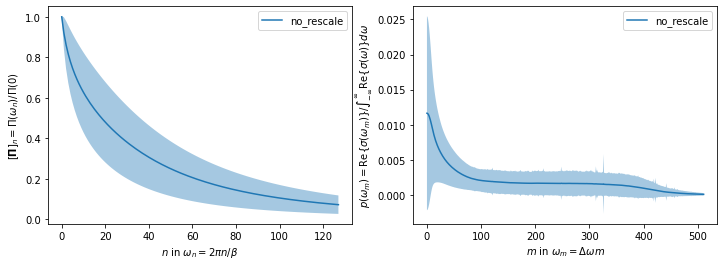

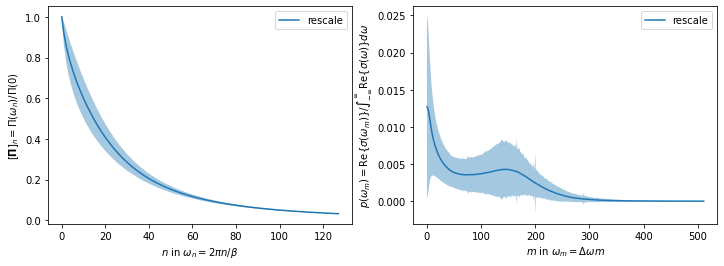

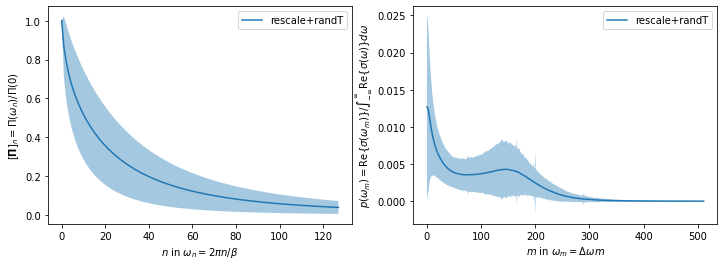

In [7]:

for key, dataset in pi.items():
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    y = pi[key]
    avg = pi[key].mean(0)
    std = pi[key].std(0)
    x=np.arange(128)
    ax[0].plot(x, avg, label=key)
    ax[0].fill_between(x, avg-std, avg+std, alpha=0.4)

    y = sigma[key]
    avg = sigma[key].mean(0)
    std = sigma[key].std(0)
    x=np.arange(512)
    ax[1].plot(x, avg, label=key)
    ax[1].fill_between(x, avg-std, avg+std, alpha=0.4)

    ax[0].set_xlabel(r"$n$ in $\omega_n = 2\pi n / \beta$")
    ax[0].set_ylabel(r"$[{\bf \Pi}]_n = \Pi(\omega_n)/\Pi(0)$")
    ax[0].legend()
    ax[1].set_xlabel(r"$m$ in $\omega_m = \Delta\omega m$")
    ax[1].set_ylabel(r"$p(\omega_m) = {\rm Re}\{\sigma(\omega_m)\} / \int_{-\infty}^{\infty} {\rm Re}\{\sigma(\omega)\} d\omega$")
    ax[1].legend()
    plt.show()

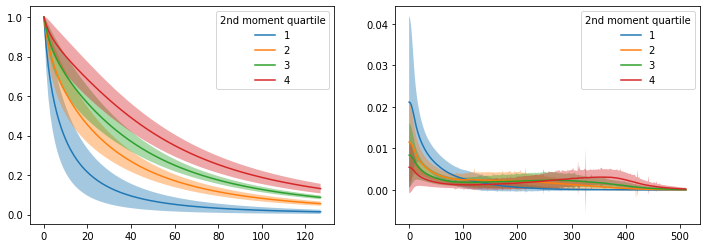

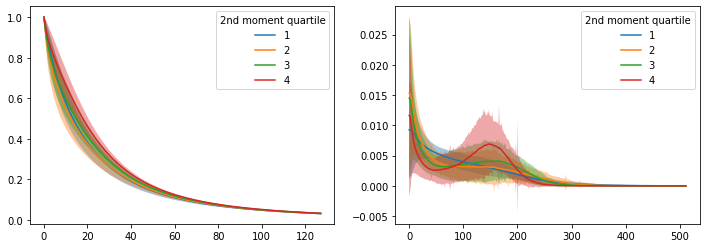

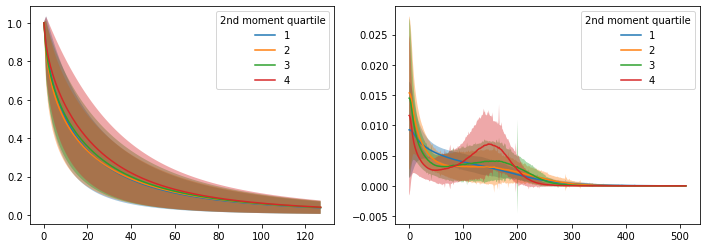

In [15]:
for key in sigma:
    split_by = scale #pfit[key]

    quartiles = [
        np.quantile(split_by, 0),
        np.quantile(split_by, 0.25),
        np.quantile(split_by, 0.5),
        np.quantile(split_by, 0.75),
        np.quantile(split_by, 1)
    ]
    
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    for i in range(len(quartiles)-1):
        lb = quartiles[i]
        ub = quartiles[i+1]
        mask = np.logical_and(lb<split_by, split_by<ub)
        # print(f"{mask.sum():5.0f} between {lb:.2f} and {ub:.2f}")
        
        y = pi[key][mask,:]
        avg = pi[key][mask].mean(0)
        std = pi[key][mask].std(0)
        x=np.arange(128)
        ax[0].plot(x, avg, label=i+1)
        ax[0].fill_between(x, avg-std, avg+std, alpha=0.4)

        y = sigma[key][mask,:]
        avg = sigma[key][mask].mean(0)
        std = sigma[key][mask].std(0)
        x=np.arange(512)
        ax[1].plot(x, avg, label=i+1)
        ax[1].fill_between(x, avg-std, avg+std, alpha=0.4)
        
    ax[0].legend(title="2nd moment quartile")
    ax[1].legend(title="2nd moment quartile")
    plt.show()